In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
balance = pd.read_csv('balanced_ascending.csv', header = None, index_col = 0).T
print('Statistics Summary for the Height of Balaced Trees from Ascending Keys')
balance = balance.iloc[:999, :]
balance = balance.astype('int64')
balance.describe(include = 'all')

Statistics Summary for the Height of Balaced Trees from Ascending Keys


,64,128,256,512,1024,2048,4096
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,7.041041,8.291291,9.702703,10.955956,12.002002,13.053053,14.295295
std,0.198485,0.454585,0.457297,0.205296,0.044721,0.224252,0.456404
min,7.000000,8.000000,9.000000,10.000000,12.000000,13.000000,14.000000
25%,7.000000,8.000000,9.000000,11.000000,12.000000,13.000000,14.000000
50%,7.000000,8.000000,10.000000,11.000000,12.000000,13.000000,14.000000
75%,7.000000,9.000000,10.000000,11.000000,12.000000,13.000000,15.000000
max,8.000000,9.000000,10.000000,11.000000,13.000000,14.000000,15.000000


In [3]:
random = pd.read_csv('random_ascending.csv', header = None, index_col = 0).T
print('Statistics Summary for the Height of Random Trees from Ascending Keys')
random = random.iloc[:999, :]
random = random.astype('int64')
random.describe()

Statistics Summary for the Height of Random Trees from Ascending Keys


,64,128,256,512,1024,2048,4096
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,11.601602,14.186186,16.828829,19.382382,22.201201,24.905906,27.543544
std,1.465515,1.645839,1.798388,1.793981,1.939092,1.944406,1.982351
min,8.000000,11.000000,13.000000,15.000000,18.000000,20.000000,23.000000
25%,11.000000,13.000000,16.000000,18.000000,21.000000,24.000000,26.000000
50%,11.000000,14.000000,17.000000,19.000000,22.000000,25.000000,27.000000
75%,12.000000,15.000000,18.000000,20.000000,23.000000,26.000000,29.000000
max,19.000000,21.000000,25.000000,27.000000,31.000000,33.000000,35.000000


In [4]:
random_stacked = pd.DataFrame(random.stack())
size = [i[1] for i in np.array(random_stacked.index)]
height = [i[0] for i in random_stacked.values]
random_stacked = pd.DataFrame({'size' : size,
             'height' : height})
random_stacked['source'] = 'random'
random_stacked = random_stacked.sort_values('size')

In [5]:
balance_stacked = pd.DataFrame(balance.stack())
size = [i[1] for i in np.array(balance_stacked.index)]
height = [i[0] for i in balance_stacked.values]
balance_stacked = pd.DataFrame({'size' : size,
             'height' : height})
balance_stacked['source'] = 'balance'
balance_stacked = balance_stacked.sort_values('size')

In [6]:
merged = pd.merge(balance_stacked, random_stacked, how="outer")

Text(0, 0.5, 'Tree Height')

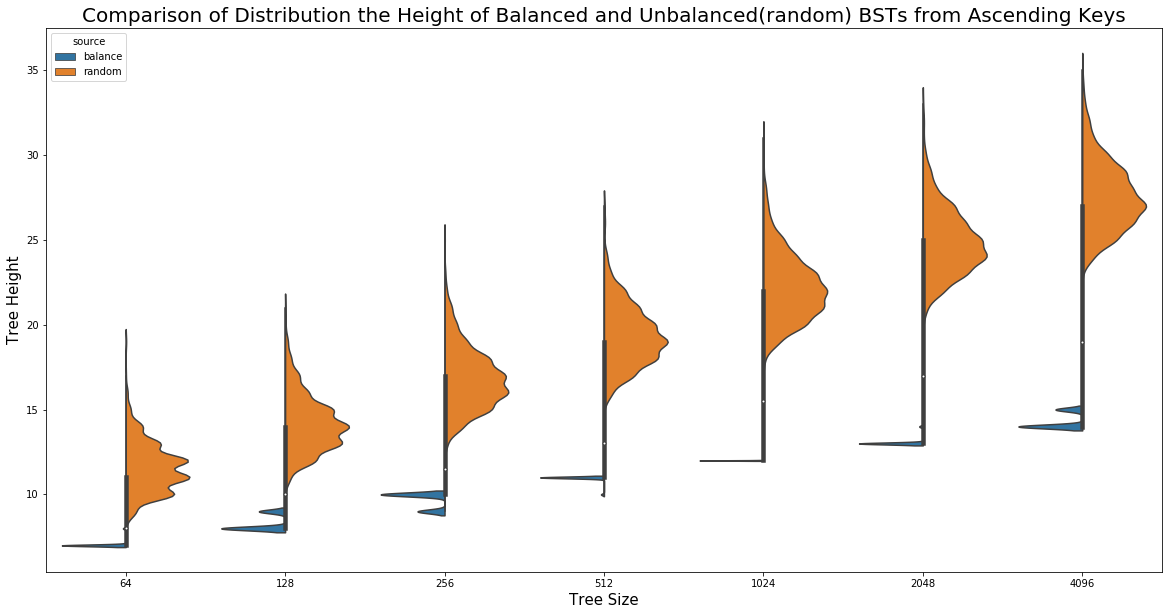

In [7]:
plt.figure(figsize = (20, 10))
sns.violinplot(x="size", y="height", hue="source",
                    data=merged, split=True, scale = 'width')
plt.title('Comparison of Distribution the Height of Balanced and Unbalanced(random) BSTs from Ascending Keys', fontsize = 20)
plt.xlabel('Tree Size', fontsize = 15)
plt.ylabel('Tree Height', fontsize = 15)

Text(0, 0.5, 'Tree Height')

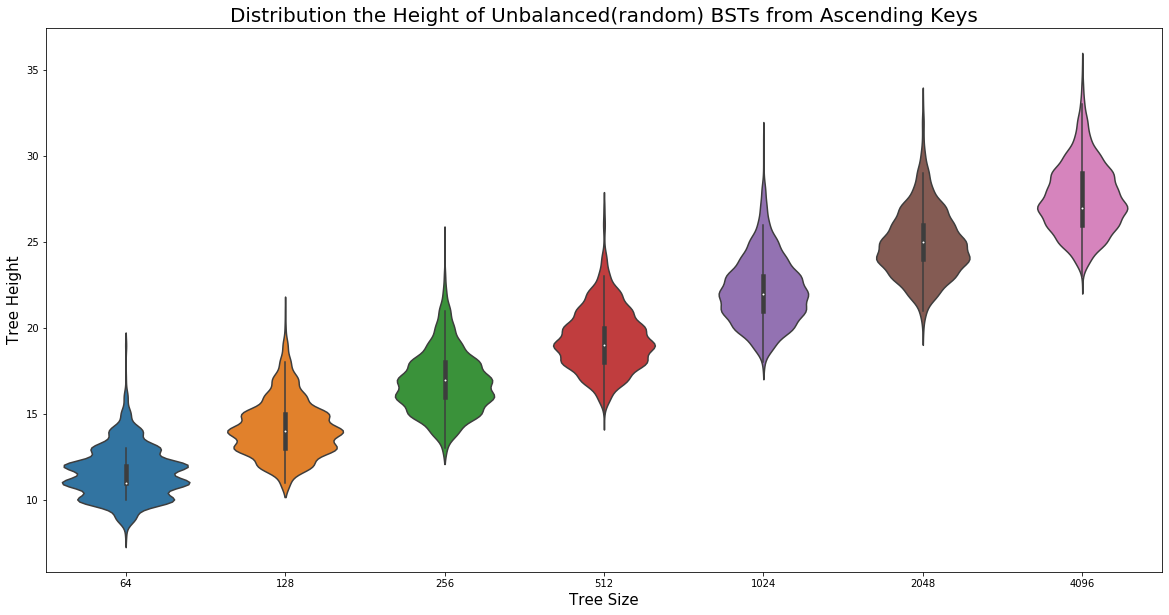

In [8]:
plt.figure(figsize = (20, 10))
sns.violinplot(x="size", y="height",
                    data=random_stacked, scale = 'area')
plt.title('Distribution the Height of Unbalanced(random) BSTs from Ascending Keys', fontsize = 20)
plt.xlabel('Tree Size', fontsize = 15)
plt.ylabel('Tree Height', fontsize = 15)

Text(0, 0.5, 'Tree Height')

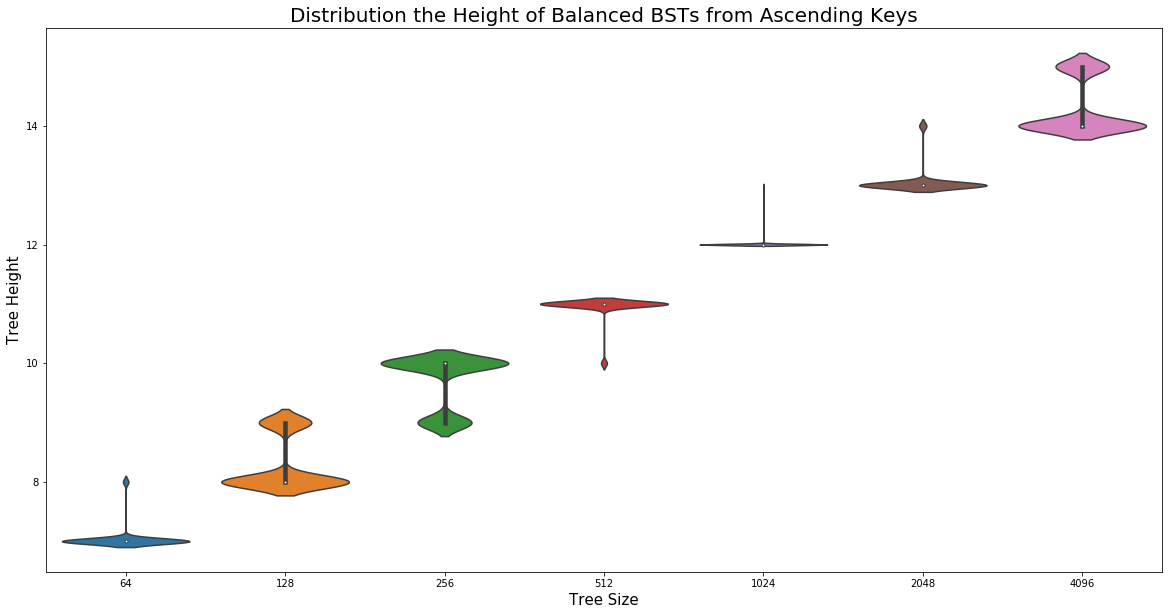

In [9]:
plt.figure(figsize = (20, 10))
sns.violinplot(x="size", y="height",
                    data=balance_stacked, scale = 'count')
plt.title('Distribution the Height of Balanced BSTs from Ascending Keys', fontsize = 20)
plt.xlabel('Tree Size', fontsize = 15)
plt.ylabel('Tree Height', fontsize = 15)